In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
#print current working directory
!pwd

/content


In [3]:
#Change directory to desired directory
%cd /content/drive/My Drive/Colab Notebooks/BI_Project

/content/drive/My Drive/Colab Notebooks/BI_Project


In [4]:
#import libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model


#plot in file
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#read in the train and test dataset and store as DataFrame objects
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BI_Project/Dalarna_Housing_Prices.csv")

In [6]:
#view object type
type(train)

pandas.core.frame.DataFrame

In [7]:
#print first 5 observations in dataframe
train.head()

,Year,Kommun,Price,Size,Type,Migrant_pop
0,2019,Falun,1360000,3.0,Lägenhet,3109
1,2019,Falun,1795000,5.0,Lägenhet,3109
2,2019,Falun,2410000,3.0,Lägenhet,3109
3,2019,Falun,880000,1.0,Lägenhet,3109
4,2019,Falun,1925000,3.0,Lägenhet,3109


In [8]:
#view number of observations and features in dataframe
train.shape

(15976, 6)

Data Exploration

In [9]:
#information of dataframe features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15976 non-null  int64  
 1   Kommun       15976 non-null  object 
 2   Price        15968 non-null  object 
 3   Size         15781 non-null  float64
 4   Type         15964 non-null  object 
 5   Migrant_pop  15976 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 749.0+ KB


In [10]:
#print distribution of type
train["Type"].value_counts()

Villa       8011
Lägenhet    7236
Radhus       717
Name: Type, dtype: int64

In [11]:
#print distribution of Prices
train["Price"].value_counts()

1200000    212
1100000    211
1300000    192
850000     191
800000     189
          ... 
118000       1
5700000      1
372500       1
1426500      1
4914000      1
Name: Price, Length: 1073, dtype: int64

In [12]:
#print distribution of year
train["Year"].value_counts()

2019    2862
2017    2577
2018    2515
2015    2410
2016    2213
2014    2009
2013    1390
Name: Year, dtype: int64

In [13]:
#print distribution of size
train["Size"].value_counts()

3.0     3586
4.0     3448
2.0     2978
5.0     2450
6.0     1288
1.0     1133
7.0      435
8.0      171
1.5       81
2.5       59
9.0       45
3.5       32
10.0      25
12.0      12
11.0      12
13.0       8
4.5        8
17.0       2
15.0       2
7.5        1
20.0       1
26.0       1
16.0       1
14.0       1
5.5        1
Name: Size, dtype: int64

Data Visualization

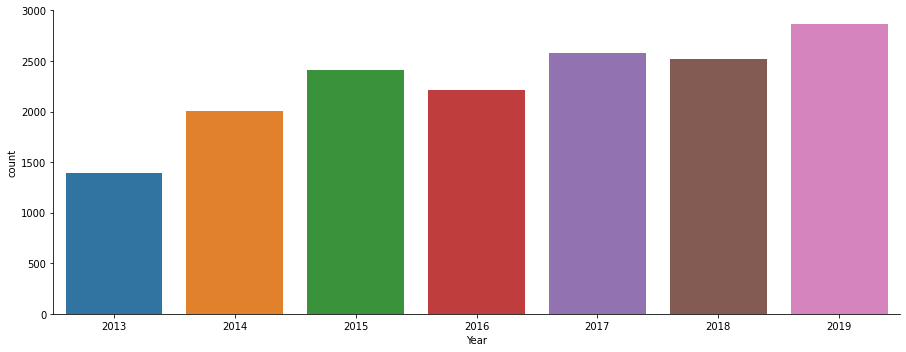

In [14]:
#Distribution:Year
sns.catplot(x="Year", data=train , kind="count",aspect=2.5 )


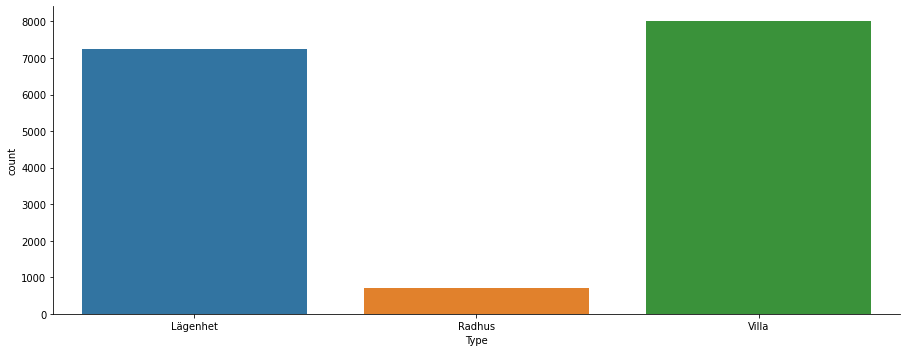

In [15]:
#Distribution:Type 
sns.catplot(x="Type", data=train, kind="count",aspect=2.5 )

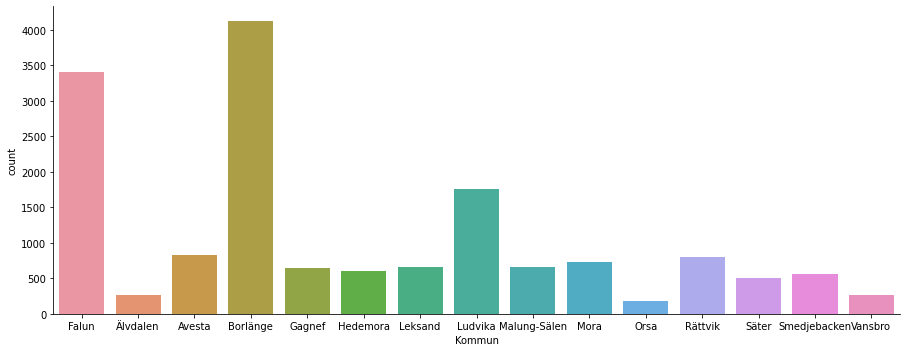

In [16]:
#Distribution:Kommun
sns.catplot(x="Kommun", data=train , kind="count",aspect=2.5 )

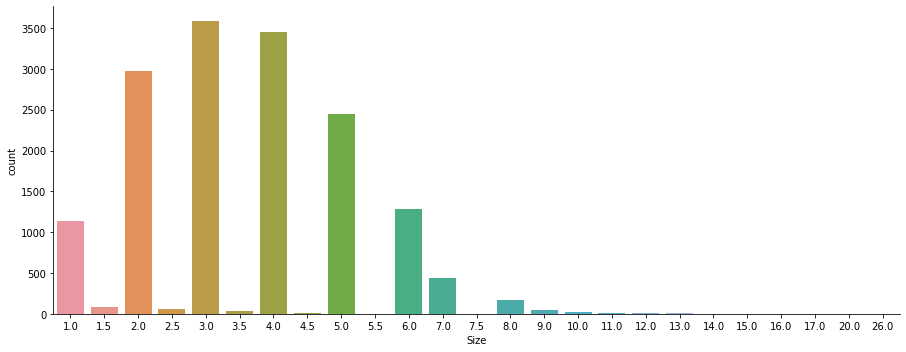

In [17]:
#Distribution:Size 
sns.catplot(x="Size", data=train, kind="count",aspect=2.5 )

Text(0.5, 0, 'Year')

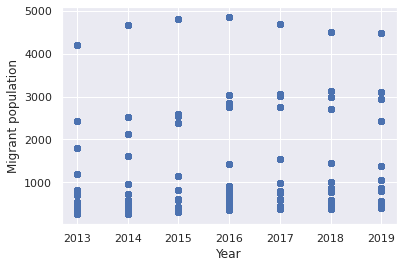

In [18]:
#plot 
sns.set(color_codes=True)
x = train["Year"]
y = train["Migrant_pop"]
plt.plot(x, y, "o")
plt.ylabel("Migrant population")
plt.xlabel("Year")

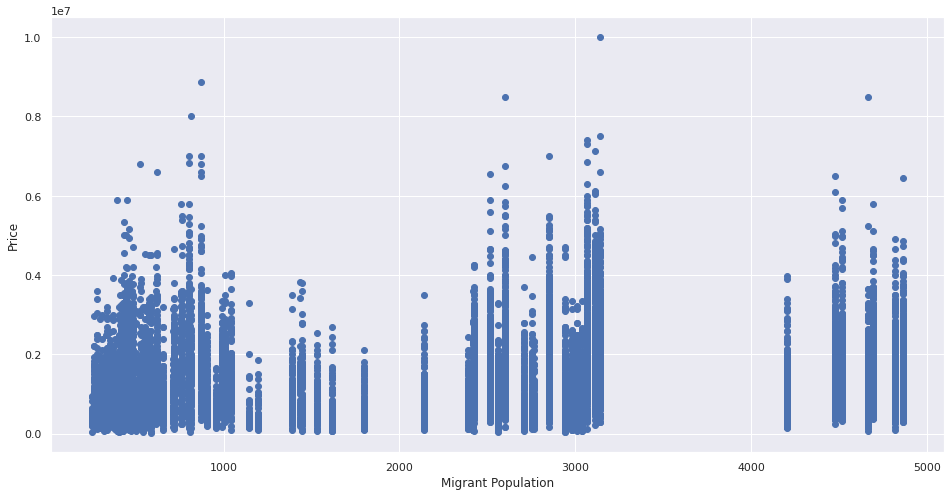

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_df['Migrant_pop'], train_df['Price'])
ax.set_xlabel('Migrant Population')
ax.set_ylabel('Price')
plt.show()

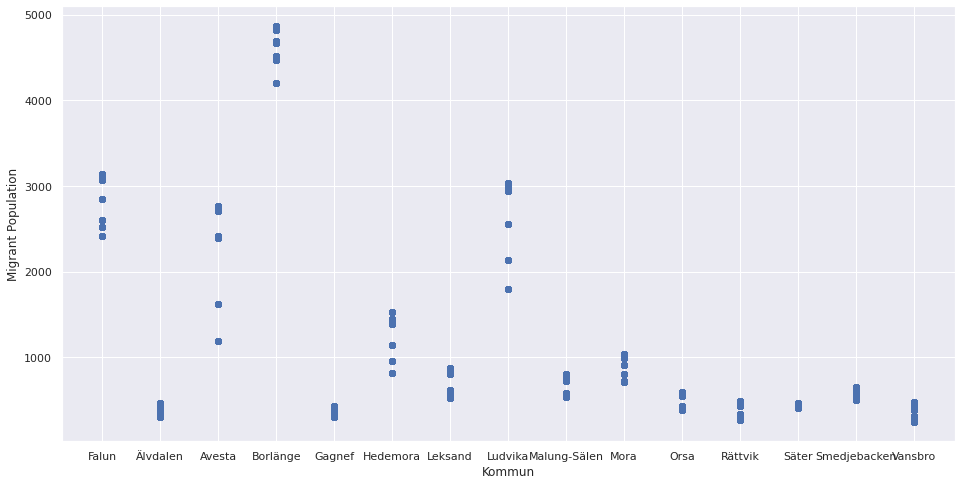

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['Kommun'], train['Migrant_pop'])
ax.set_xlabel('Kommun')
ax.set_ylabel('Migrant Population')
plt.show()

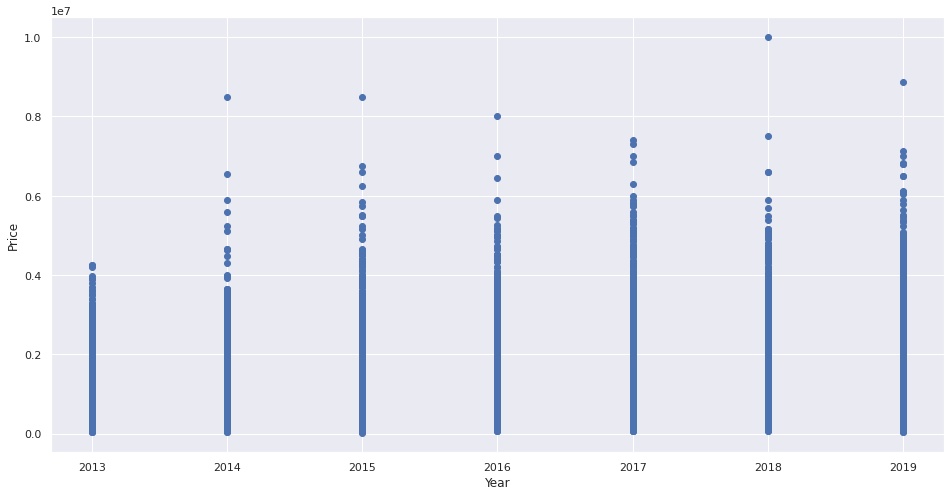

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_df['Year'], train_df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

Data preprocessing & Transformation

In [26]:
# Print missing values per feature
train.isnull().sum()

Year             0
Kommun           0
Price            8
Size           195
Type            12
Migrant_pop      0
dtype: int64

In [0]:
#create new dataframe without missing values
train_df = train.copy()
train_df = train_df.dropna()

In [28]:
train_df.isnull().sum()

Year           0
Kommun         0
Price          0
Size           0
Type           0
Migrant_pop    0
dtype: int64

In [29]:
train_df.shape

(15770, 6)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15770 entries, 0 to 15973
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15770 non-null  int64  
 1   Kommun       15770 non-null  object 
 2   Price        15770 non-null  object 
 3   Size         15770 non-null  float64
 4   Type         15770 non-null  object 
 5   Migrant_pop  15770 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 862.4+ KB


In [31]:
#feature transformation 
train_df['Year'] = pd.Categorical(train_df['Year'],ordered=True)
train_df['Year'].dtype

CategoricalDtype(categories=[2013, 2014, 2015, 2016, 2017, 2018, 2019], ordered=True)

In [32]:
train_df['Kommun'] = pd.Categorical(train_df['Kommun'])
train_df['Kommun'].dtype

CategoricalDtype(categories=['Avesta', 'Borlänge', 'Falun', 'Gagnef', 'Hedemora',
                  'Leksand', 'Ludvika', 'Malung-Sälen', 'Mora', 'Orsa',
                  'Rättvik', 'Smedjebacken', 'Säter', 'Vansbro', 'Älvdalen'],
                 ordered=False)

In [33]:
train_df["Price"] = train_df["Price"].astype(float)
train_df["Price"].dtype

dtype('float64')

In [34]:
train_df['Type'] = pd.Categorical(train_df['Type'])
train_df['Type'].dtype

CategoricalDtype(categories=['Lägenhet', 'Radhus', 'Villa'], ordered=False)

In [35]:
train_df["Migrant_pop"] = train_df["Migrant_pop"].astype(int)
train_df['Migrant_pop'].dtype

dtype('int64')

In [0]:
train_df["Size"] = train_df["Size"].astype(int)

In [37]:
train_df['Size'] = pd.Categorical(train_df['Size'], ordered=True)
train_df['Size'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  20, 26],
                 ordered=True)

In [38]:
train_df["Size"].value_counts()

3     3617
4     3455
2     3035
5     2448
6     1286
1     1214
7      434
8      171
9       45
10      25
11      12
12      12
13       8
15       2
17       2
20       1
14       1
16       1
26       1
Name: Size, dtype: int64

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15770 entries, 0 to 15973
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Year         15770 non-null  category
 1   Kommun       15770 non-null  category
 2   Price        15770 non-null  float64 
 3   Size         15770 non-null  category
 4   Type         15770 non-null  category
 5   Migrant_pop  15770 non-null  int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 433.2 KB


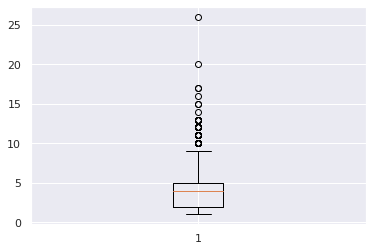

In [42]:
#Finding outliers for the size Variable 
plt.boxplot(train_df["Size"])
plt.show()

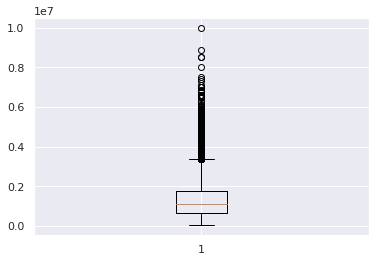

In [43]:
#Finding outliers for the price Variable 
plt.boxplot(train_df["Price"])
plt.show()

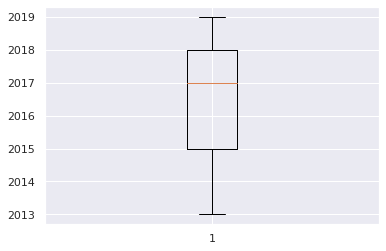

In [44]:
#Finding outliers for the Year Variable 
plt.boxplot(train_df["Year"])
plt.show()

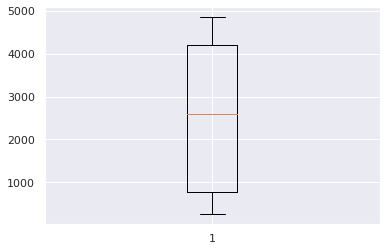

In [45]:
#Finding outliers for the migrant_pop Variable 
plt.boxplot(train_df["Migrant_pop"])
plt.show()

In [0]:
#Label encoding features
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(train_df["Kommun"])
train_df["Kommun"] = labelEncoder.transform(train_df["Kommun"])

labelEncoder.fit(train_df["Type"])
train_df["Type"] = labelEncoder.transform(train_df["Type"])

labelEncoder.fit(train_df["Size"])
train_df["Size"] = labelEncoder.transform(train_df["Size"])

labelEncoder.fit(train_df["Year"])
train_df["Year"] = labelEncoder.transform(train_df["Year"])

In [47]:
#variable dimension reduction removing all sizes above size 8 
train_df2 = train_df.copy()
train_df2=train_df2[(train_df["Size"]<9)]
train_df2

,Year,Kommun,Price,Size,Type,Migrant_pop
0,6,2,1360000.0,2,0,3109
1,6,2,1795000.0,4,0,3109
2,6,2,2410000.0,2,0,3109
3,6,2,880000.0,0,0,3109
4,6,2,1925000.0,2,0,3109
...,...,...,...,...,...,...
15969,0,13,425000.0,3,2,251
15970,0,13,535000.0,3,2,251
15971,0,13,550000.0,3,2,251
15972,0,13,600000.0,4,2,251


In [48]:
#Z score
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(train_df2))
print(z)


[[1.37149644 0.59808439 0.03456245 0.38487038 1.05944826 0.39467114]
 [1.37149644 0.59808439 0.50405768 0.87345986 1.05944826 0.39467114]
 [1.37149644 0.59808439 1.16782681 0.38487038 1.05944826 0.39467114]
 ...
 [1.7447292  2.31370879 0.83967007 0.24429474 0.9886358  1.39922188]
 [1.7447292  2.31370879 0.7857051  0.87345986 0.9886358  1.39922188]
 [1.7447292  2.31370879 0.89363503 0.87345986 0.9886358  1.39922188]]


In [49]:
#defining the threshold for outlier detection
threshold = 3
print(np.where(z > 3))

(array([  257,  1073,  1075,  1076,  1077,  1078,  1081,  1082,  1084,
        1086,  1090,  1091,  1092,  1093,  1106,  1162,  1163,  1164,
        1327,  1459,  1465,  1466,  1476,  1487,  1488,  1494,  1504,
        1506,  1514,  1515,  1516,  1520,  1531,  1556,  1567,  1578,
        1580,  1582,  1590,  1593,  1594,  1597,  1598,  1606,  1616,
        1621,  1630,  1630,  1645,  1703,  1799,  1805,  1805,  1830,
        1852,  1912,  1931,  1980,  2144,  2146,  2156,  2161,  2188,
        2191,  2192,  2194,  2195,  2203,  2211,  2214,  2262,  2295,
        2327,  2345,  2429,  2553,  2581,  2593,  2680,  3012,  3767,
        3769,  3772,  3799,  4014,  4058,  4107,  4135,  4154,  4172,
        4176,  4179,  4184,  4186,  4200,  4202,  4210,  4219,  4242,
        4248,  4251,  4254,  4261,  4265,  4273,  4282,  4287,  4374,
        4392,  4396,  4420,  4441,  4452,  4455,  4472,  4491,  4543,
        4606,  4727,  4737,  4746,  5010,  5115,  5123,  5191,  5254,
        5464,  5561

In [0]:
#create new dataframe without outliers 2
train_df3 = train_df2[(z < 3).all(axis=1)]

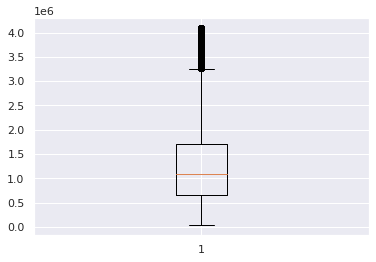

In [51]:
#Finding outliers for the price Variable 
plt.boxplot(train_df3["Price"])
plt.show()

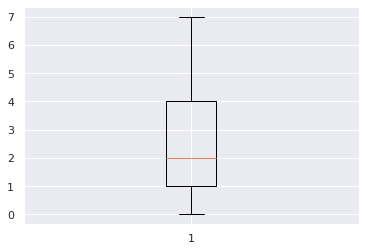

In [52]:
#Finding outliers for the price Variable 
plt.boxplot(train_df3["Size"])
plt.show()

In [53]:
train_df3["Size"].value_counts()

2    3603
3    3411
1    3035
4    2391
5    1221
0    1214
6     398
7     149
Name: Size, dtype: int64

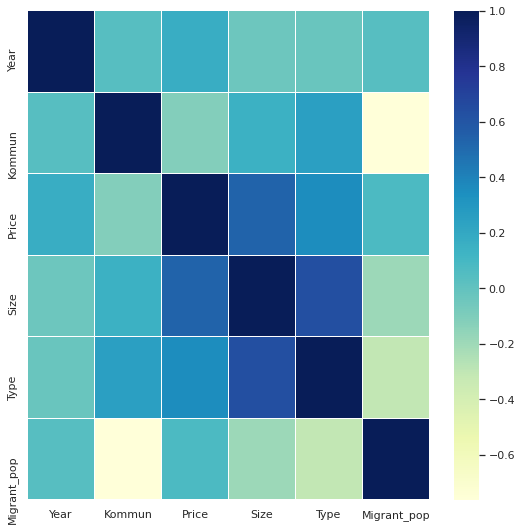

In [54]:
#plotting correlation matrix
corrmat = train_df3.corr() 
  
f, ax = plt.subplots(figsize =(9, 9)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [55]:
train_df3.head()

,Year,Kommun,Price,Size,Type,Migrant_pop
0,6,2,1360000.0,2,0,3109
1,6,2,1795000.0,4,0,3109
2,6,2,2410000.0,2,0,3109
3,6,2,880000.0,0,0,3109
4,6,2,1925000.0,2,0,3109


In [56]:
train_df3.shape

(15422, 6)

In [0]:
#new data frame for plots
features = train_df3.drop(["Price"],axis=1)
prices= train_df3["Price"]

In [58]:
features.head()

,Year,Kommun,Size,Type,Migrant_pop
0,6,2,2,0,3109
1,6,2,4,0,3109
2,6,2,2,0,3109
3,6,2,0,0,3109
4,6,2,2,0,3109


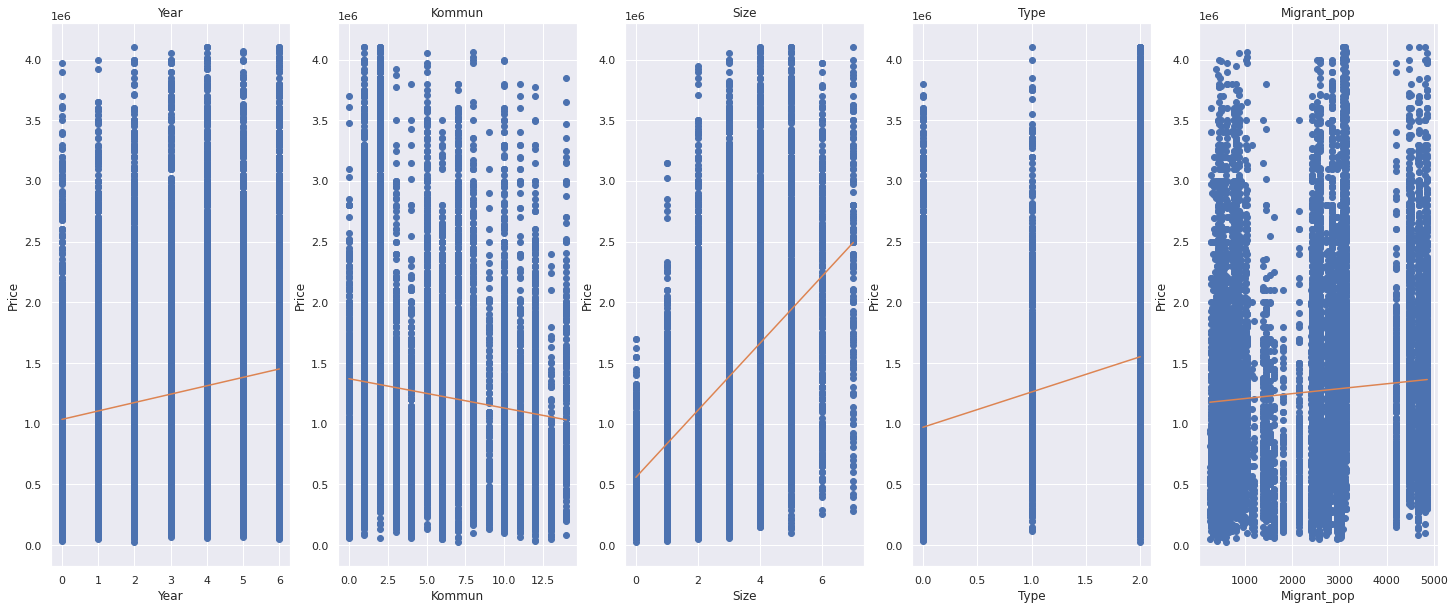

In [59]:
#plot regression line with price and independent variables
plt.figure(figsize=(30, 10))

for i, col in enumerate(features.columns):
    # 5 plots
    plt.subplot(1, 6, i+1)
    x = train_df3[col]
    y = prices
    plt.plot(x, y, "o")
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Price")

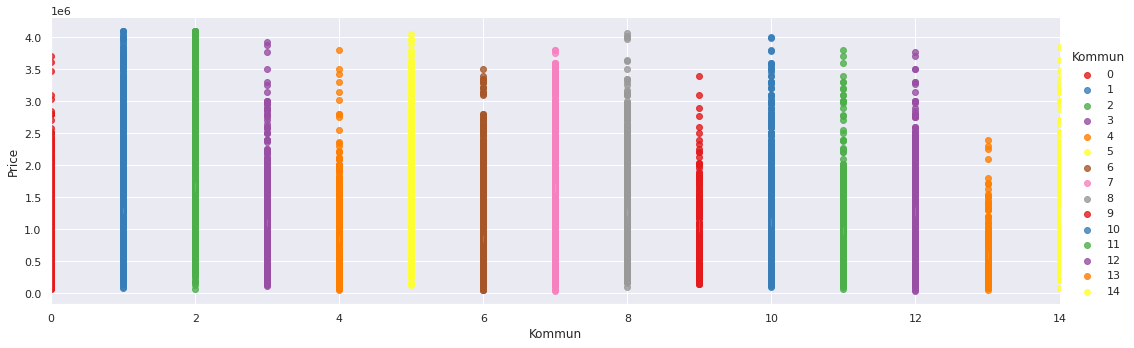

In [60]:
#plot prices per Kommun
g = sns.lmplot(x="Kommun", y="Price", hue="Kommun", data=train_df3,  aspect=3,  palette="Set1")

Modeling

In [84]:
#split data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 7)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [0]:
#standardize data in data frames. use only for decision tree
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#performance metric to calculate accuracy of regression models
def performance_metric(y_test, y_predict):
    from sklearn.metrics import r2_score
    score = r2_score(y_test, y_predict)
    return score

In [105]:
#implement decision tree with varying depths
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=12)
regr_5 = DecisionTreeRegressor(max_depth=None)
regr_6 = DecisionTreeRegressor(max_depth=20)
regr_7 = DecisionTreeRegressor(max_depth=25)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)
regr_4.fit(x_train, y_train)
regr_5.fit(x_train, y_train)
regr_6.fit(x_train, y_train)
regr_7.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
# Predict
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
y_3 = regr_3.predict(x_test)
y_4 = regr_4.predict(x_test)
y_5 = regr_5.predict(x_test)
y_6 = regr_6.predict(x_test)
y_7 = regr_7.predict(x_test)

In [88]:
#assess different decision regression models
performance_metric(y_test,y_1)

0.37111742857051133

In [89]:
performance_metric(y_test,y_2)

0.469315283552174

In [107]:
dec_tree = performance_metric(y_test,y_3)
dec_tree

0.5510529827084714

In [91]:
 performance_metric(y_test,y_4)

0.5511285073374321

In [92]:
performance_metric(y_test,y_5)


0.5399533890543005

In [93]:
performance_metric(y_test,y_6)

0.5428194939080457

In [95]:
performance_metric(y_test,y_7)

0.5432094446240161

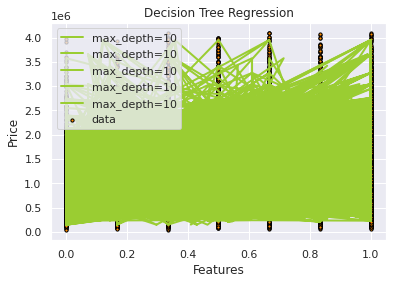

In [108]:
# Plot the results of decision tree
plt.figure()
plt.scatter(x_train[:,0], y_train, s=10, edgecolor="black",c="darkorange", label="data")
plt.plot(x_test, y_3, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("Features")
plt.ylabel("Price")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

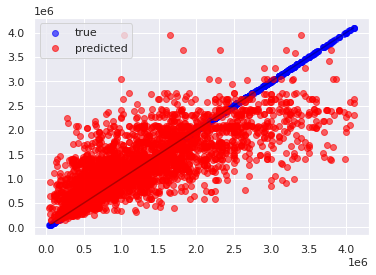

In [97]:
#Plot true values
actual = plt.scatter(y_test, y_test, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(y_test,y_test,1))
lims = np.linspace(min(y_test) - 1, max(y_test) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
predicted = plt.scatter(y_test, y_3, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[actual,predicted], loc='upper left')
plt.show()

In [0]:
#implement linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

Coefficients: 
 [ 7.95056204e+04 -3.30090688e+04  2.71514496e+05  7.01415137e+04
  3.71029953e+01]
Mean squared error: 429250022004.83
Coefficient of determination: 0.35


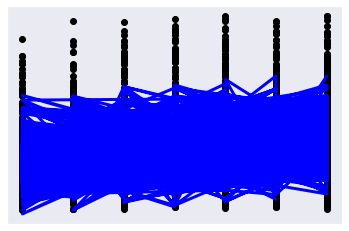

In [99]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination
print("Coefficient of determination: %.2f"
      % r2_score(y_test,y_pred))

# Plot outputs
plt.scatter(x_test.iloc[:,0], y_test,  color="black")
plt.plot(x_test.iloc[:,0], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [100]:
#evaluate performance of linear regression model
lin_reg=performance_metric(y_test,y_pred)
lin_reg

0.35464279433493173

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=None, random_state=7)
regr.fit(x_train, y_train)

ran_pred=(regr.predict(x_test))

In [102]:
##evaluate performance of random forest  model
ran_forrest=performance_metric(y_test,ran_pred)
ran_forrest

0.5615903370042628

In [103]:
#print results in a table
results = pd.DataFrame({
    "Model": ["Decision Tree", "Multiple Linear Regression", 
              'Random Forest'],
    "Score": [dec_tree, lin_reg, ran_forrest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index("Model")
print(result_df.head(3))

                               Score
Model                               
Random Forest               0.561590
Decision Tree               0.551053
Multiple Linear Regression  0.354643
